In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [131]:
# Данные телеком компании
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [132]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.shape

(7043, 21)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [135]:
# приводим TotalCharges из строкового типа в число
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# errors = 'coerce' все пропуски будут заменены на NAN - который имеет тип float

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


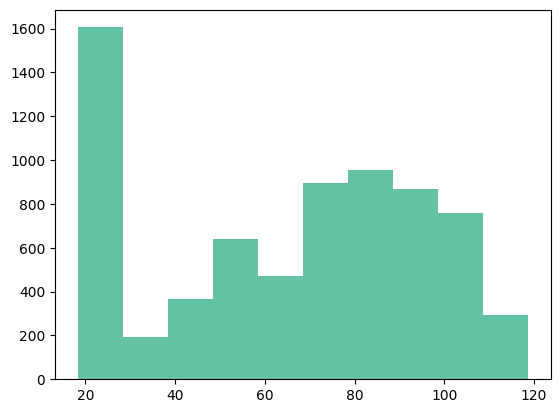

In [137]:
# посмотрим сколько клиенты платят за месяц за услуги

plt.hist(df['MonthlyCharges'])
plt.show()

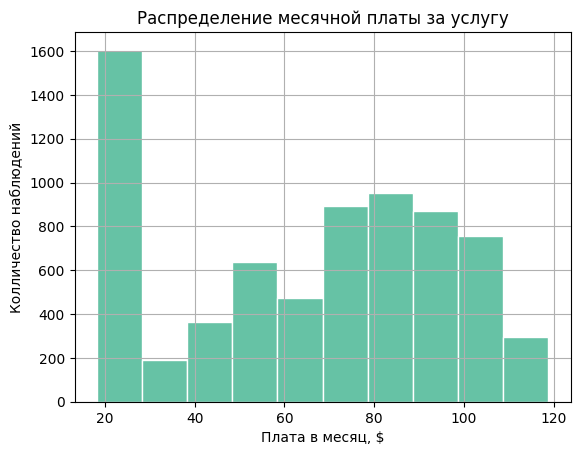

In [138]:
plt.hist(df['MonthlyCharges'], edgecolor= 'w')
plt.title('Распределение месячной платы за услугу')
plt.xlabel('Плата в месяц, $')
plt.ylabel('Колличество наблюдений')
plt.grid()
plt.show()

In [139]:
# мы видим что есть пик на 20 $ - много клиентов платят эту сумму, но основная масса распределена от 40 до 120

In [140]:
# построим то же самое при помощи Seaborn

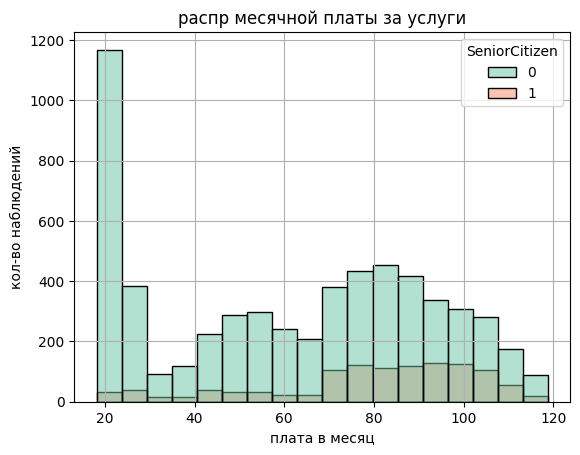

In [141]:
pic = sns.histplot(data=df,x='MonthlyCharges', hue= 'SeniorCitizen')
pic.set(xlabel= 'плата в месяц', ylabel='кол-во наблюдений', title = 'распр месячной платы за услуги')
plt.grid()
plt.show()

In [142]:
# построим то же график с использованием plotly
# nbinsx = 20 - параметр которым можно задать кол-во бакетов
hist = go.Histogram(x=df['MonthlyCharges'], nbinsx=50)
# создаем обьект Figure и в него передаем нашу гистограмму
fig = go.Figure(data=hist)

fig.update_layout(
    width=600,
    height=400,
    title = 'Распределение платы за услуги',
    xaxis_title='плата в месяц',
    yaxis_title='кол-во наблюдений'
)
fig.show()



### Категориальные признаки

In [143]:
# Рассмотрим методы оплаты и какие из них самые популярные
# Распределение признака по частоте

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [144]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


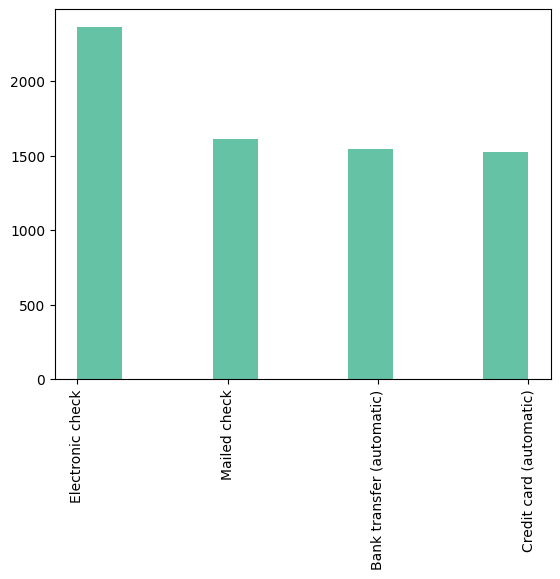

In [146]:
plt.hist(df['PaymentMethod'])
plt.xticks(rotation =90)
plt.show()

<Axes: xlabel='count', ylabel='PaymentMethod'>

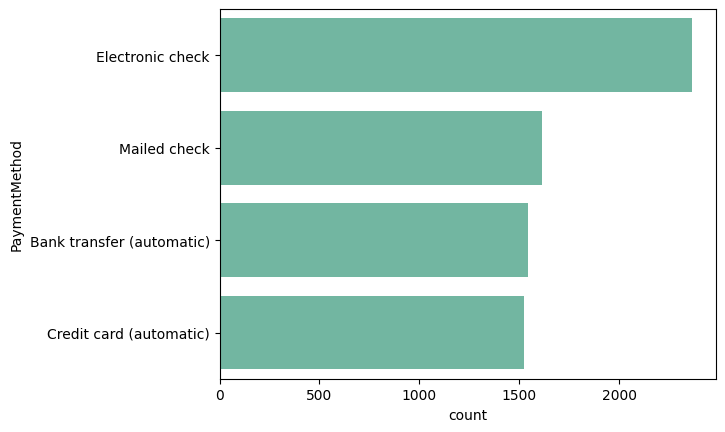

In [147]:
sns.countplot(y = df['PaymentMethod'])

In [148]:
plt.show()

In [149]:
# выведем три самых популярных значения

df['PaymentMethod'].value_counts().head(3).index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)'], dtype='object', name='PaymentMethod')

<Axes: xlabel='count', ylabel='PaymentMethod'>

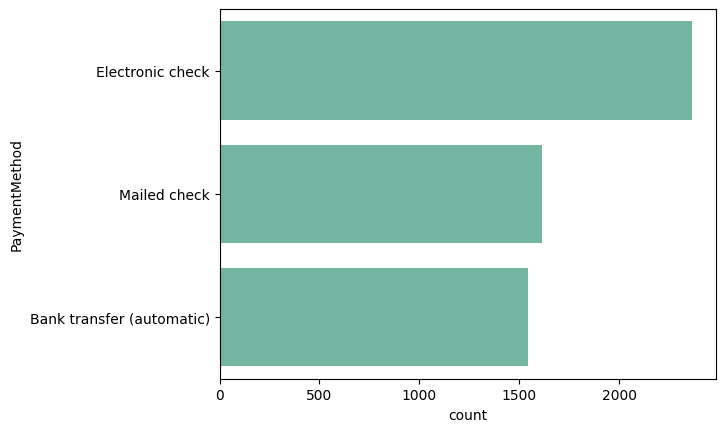

In [150]:
sns.countplot(df[df['PaymentMethod'].isin(df['PaymentMethod'].value_counts().head(3).index)]['PaymentMethod'])

In [151]:
plt.show()

## Взаимодействие признаков

### Возмжны три варианта : количественный - количественный , количественный - категориальный, категориальный - категориальный

### Количественный - количественный

### Мы хотим узнать как зависит время жизни клиента с компанием от его выплаты. Логично что чем дольше клиент работает с компанием тем больше он заплатит

In [152]:
# посчитеам сколько заплати в среднем один клиент в зависимости от количества месяцев

df1 = df.groupby('tenure').agg({'TotalCharges': 'mean'}).reset_index()
df1.head()

,tenure,TotalCharges
0,0,NaN
1,1,50.485808
2,2,114.332353
3,3,174.690000
4,4,230.530682


In [153]:
# построим график с помощью ploply

# nbinsx = 20 - параметр которым можно задать кол-во бакетов
line = go.Scatter(x=df1['tenure'], y= df1['TotalCharges'],mode ='lines')
# создаем обьект Figure и в него передаем нашу гистограмму
fig = go.Figure(data=line)

fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    title = 'График зависимости суммы выплат от времени пользования услугами',
    xaxis_title='кол-во месяцев',
    yaxis_title='сумма выплат'
)
fig.show()

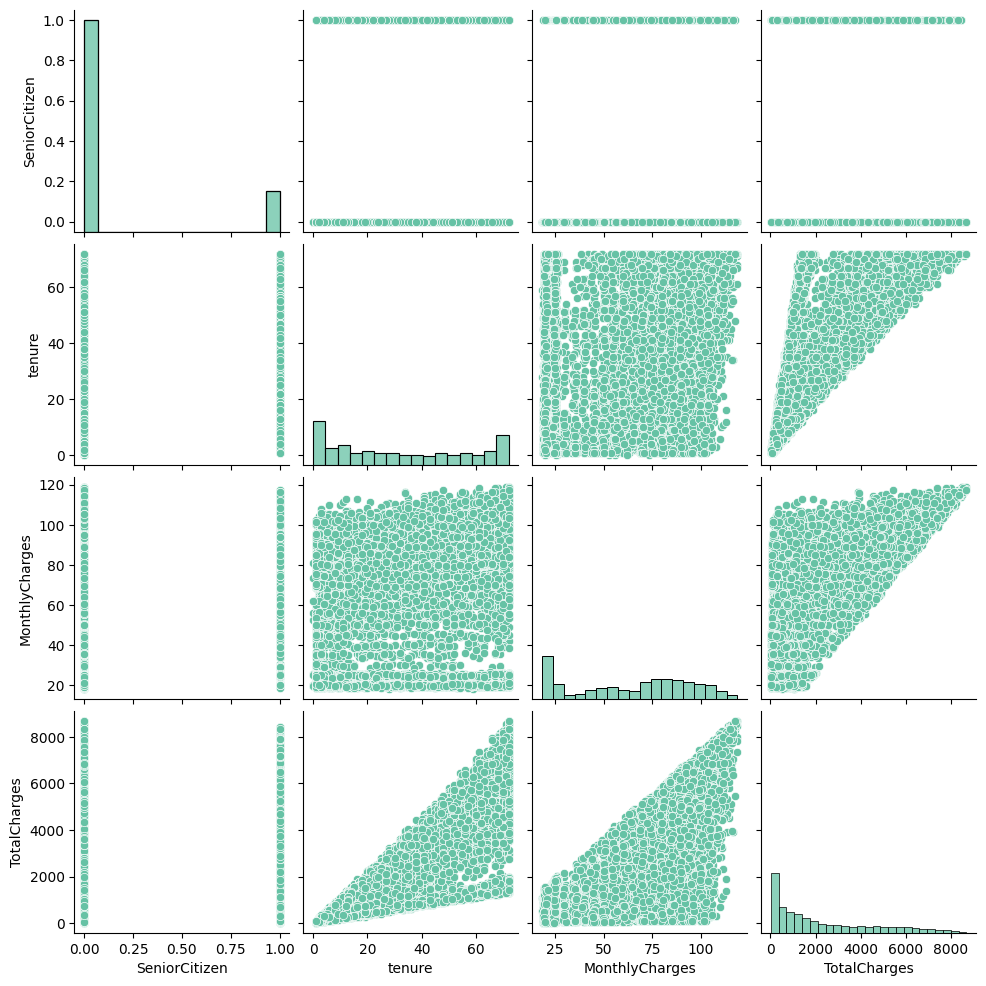

In [154]:
# построим диаграммы расееяния всех количественных признаков
sns.pairplot(df)
plt.show()

Text(0, 0.5, 'время работы с компанией')

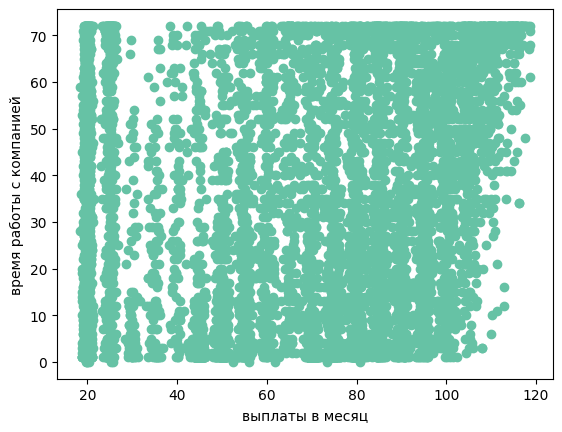

In [155]:
# изобразим диаграмму рассеяния для двух переменных MounthlyCharges и tenure
plt.scatter(df['MonthlyCharges'],df['tenure'])
plt.xlabel('выплаты в месяц')
plt.ylabel('время работы с компанией')

In [156]:
plt.show()

In [157]:
# раскрасим точки по факту оттока - если клиент ушел в краный , если остался в синий
# переведем признак Charn в цвета

df['Churn'].map({'No': 'blue', 'Yes': 'orange'}).head()

0      blue
1      blue
2    orange
3      blue
4    orange
Name: Churn, dtype: object

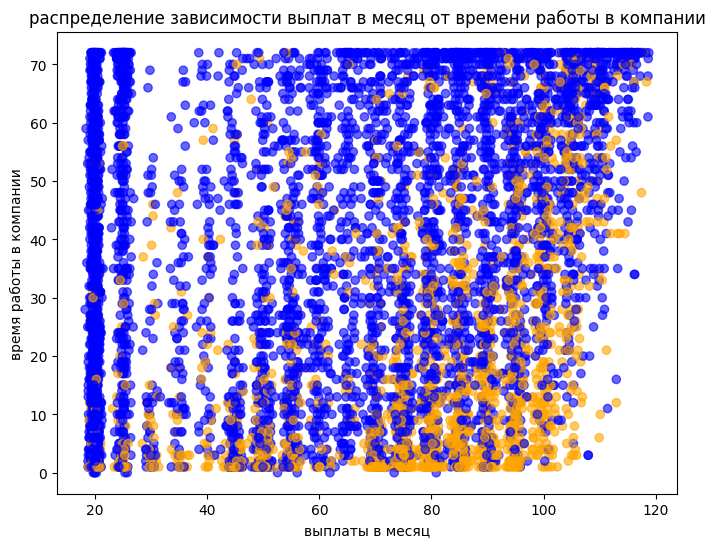

In [158]:
# построим диаграмму рассеяния

plt.figure(figsize = (8,6))
plt.scatter(df['MonthlyCharges'], df['tenure'],color = df['Churn'].map({'No': 'blue', 'Yes': 'orange'}), alpha=0.6)

plt.title('распределение зависимости выплат в месяц от времени работы в компании')
plt.xlabel('выплаты в месяц')
plt.ylabel('время работы в компании')
plt.show()

In [159]:
# можно выдвинуть гипотезу о том что клиенты которые много платят и мало месяцев задерживаются в компании с большей вероятностью уйдут! но это лишь гипотеза!!

In [160]:
# выделим клиентов которые ушли в отдельную диаграмму

In [161]:
df[df['Churn'] == 'Yes'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   object 
 4   Dependents        1869 non-null   object 
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   object 
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   object 
 10  OnlineBackup      1869 non-null   object 
 11  DeviceProtection  1869 non-null   object 
 12  TechSupport       1869 non-null   object 
 13  StreamingTV       1869 non-null   object 
 14  StreamingMovies   1869 non-null   object 
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   object 
 17  

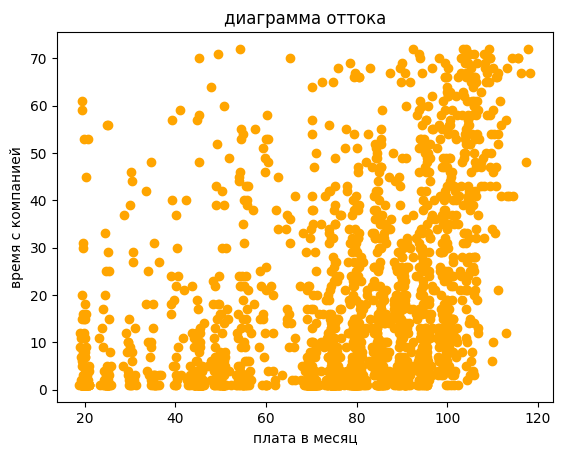

In [162]:
li = plt.scatter(df[df['Churn']== 'Yes']['MonthlyCharges'],df[df['Churn']=='Yes']['tenure'], color = 'orange')
plt.title('диаграмма оттока')
plt.xlabel('плата в месяц')
plt.ylabel('время с компанией')
plt.show()

### Количественный-категориальный

### Посмотрим как выглядит месячная плата за услуги в зависимости от флага оттока
 

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

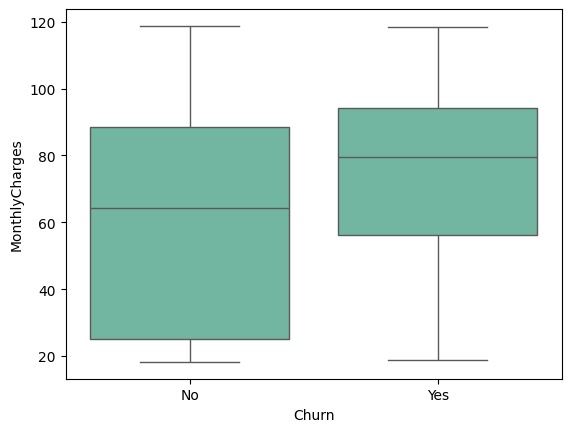

In [163]:
sns.boxplot(x='Churn', y = 'MonthlyCharges', data=df)

In [164]:
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

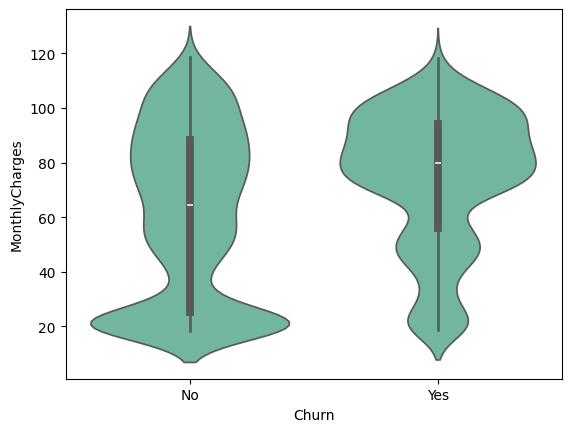

In [165]:
sns.violinplot(x = 'Churn', y = 'MonthlyCharges', data=df)

In [166]:
plt.show()

### Как это читать! Белая точка - зто медиана. Толстая черная линия это межквартильный диапазон. Т.е. значения которые укладываются в межквартильный диапазон между 25% и 75% перцентилями
Тонкая черная линия показывает доверительныый интервал с 95% вероятностью.Иными словами 95% находятся на этой линии.Чем толще скрипка тем больше в этой точке наблюдений.

## Категориальный - категориальный

### Посмотрим что еще может влиять на факт ухода клиента


In [167]:
# Посмотрим долю ушедших клиентов по типу интернета и типу контракта
# в нашем случает три вида контракта:
#     - раз в месяц
 #     - раз в год
  #    - раз в два года
# Типов интернета так же три:
#   - DSL(цифровой)
#   - Fiber optic(оптоволокно)
#   - без интернета
#

In [168]:
# построим кросс таблицу по горизонтали тип контракта по вертикали тип интернета

df['churn_flag']= df['Churn'].map({'Yes': 1, 'No': 0}) # флаг оттока


In [169]:
table = pd.pivot_table(data=df, index='InternetService', columns='Contract', values='churn_flag', aggfunc='mean')
table

Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,0.322159,0.092982,0.019108
Fiber optic,0.546053,0.192950,0.072261
No,0.188931,0.024725,0.007837


In [170]:
# визуализируем таблицу

<Axes: xlabel='Contract', ylabel='InternetService'>

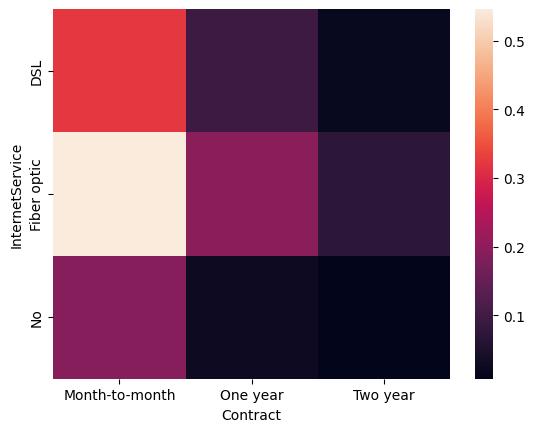

In [171]:
sns.heatmap(table)

In [172]:
plt.show()

### Видим что люди с оптоволоконным интернетом кто платит раз в месяц больше всего уходят!

## Задание 1

 ### "Давайте продолжим искать переменные, которые разделяют факт ухода клиента. Посмотрим, влияет ли флаг пенсионера на вероятность оттока. Постройте диаграмму, которая могла бы ответить на этот вопрос."

In [173]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_flag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [174]:
sc = df['SeniorCitizen'].value_counts()

In [175]:
sc

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [176]:
sc.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, 0 to 1
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


In [177]:
sc.isnull()

SeniorCitizen
0    False
1    False
Name: count, dtype: bool

In [221]:
sc_service = df[df['SeniorCitizen'] == 1]['InternetService'].value_counts(normalize=True) *100
sc_service = sc_service.round(2)
sc_service

InternetService
Fiber optic    72.77
DSL            22.68
No              4.55
Name: proportion, dtype: float64

In [222]:
no_sc_service = df[df['SeniorCitizen'] == 0]['InternetService'].value_counts(normalize=True) *100
no_sc_service = no_sc_service.round(2)
no_sc_service

InternetService
Fiber optic    38.38
DSL            36.64
No             24.98
Name: proportion, dtype: float64

In [178]:
sc = df['SeniorCitizen'].sum()

In [179]:
sc

np.int64(1142)

In [180]:
sc_gender = df[df['SeniorCitizen'] == 1]['gender'].value_counts()

In [181]:
sc_gender

gender
Male      574
Female    568
Name: count, dtype: int64

In [182]:
# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("Set2")

# 1. Столбчатая диаграмма: процент оттока среди пенсионеров и не-пенсионеров
plt.figure(figsize=(12, 7))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [183]:
churn_by_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')*100

In [184]:
churn_by_senior

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


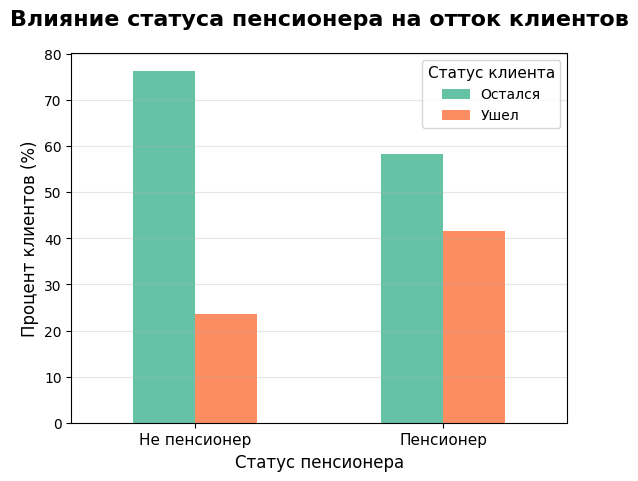

In [187]:
# Визуализация
ax = churn_by_senior.plot(kind='bar', stacked=False)
plt.title('Влияние статуса пенсионера на отток клиентов', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Статус пенсионера', fontsize=12)
plt.ylabel('Процент клиентов (%)', fontsize=12)
plt.xticks([0, 1], ['Не пенсионер', 'Пенсионер'], rotation=0, fontsize=11)
plt.legend(['Остался', 'Ушел'], title='Статус клиента', title_fontsize=11)
plt.grid(axis='y', alpha=0.3)

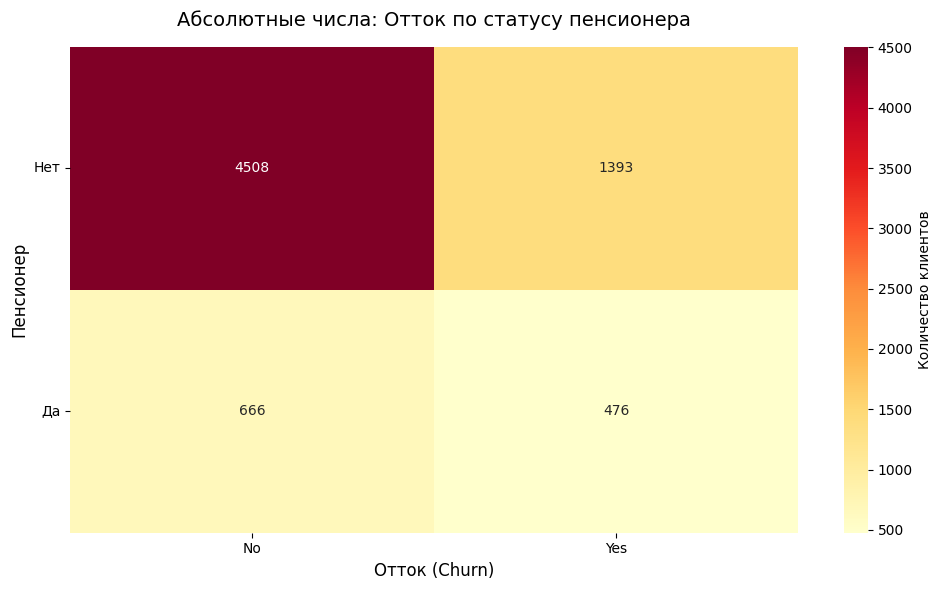

In [189]:
# 2. Упрощенная тепловая карта (убираем второй subplot)
plt.figure(figsize=(10, 6))
churn_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])
sns.heatmap(churn_counts, annot=True, fmt='d', cmap='YlOrRd',
           cbar_kws={'label': 'Количество клиентов'})
plt.title('Абсолютные числа: Отток по статусу пенсионера', fontsize=14, pad=15)
plt.xlabel('Отток (Churn)', fontsize=12)
plt.ylabel('Пенсионер', fontsize=12)
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['Нет', 'Да'], rotation=0)
plt.tight_layout()
plt.show()

In [190]:
# 3. Статистическая сводка
print("=" * 60)
print("СТАТИСТИЧЕСКАЯ СВОДКА: ВЛИЯНИЕ СТАТУСА ПЕНСИОНЕРА НА ОТТОК")
print("=" * 60)

total_seniors = df['SeniorCitizen'].sum()
total_non_seniors = len(df) - total_seniors

churn_seniors = df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 'Yes')].shape[0]
churn_non_seniors = df[(df['SeniorCitizen'] == 0) & (df['Churn'] == 'Yes')].shape[0]

pct_churn_seniors = (churn_seniors / total_seniors) * 100 if total_seniors > 0 else 0
pct_churn_non_seniors = (churn_non_seniors / total_non_seniors) * 100 if total_non_seniors > 0 else 0

print(f"Всего клиентов в датасете: {len(df):,}")
print(f"Всего пенсионеров: {total_seniors} ({total_seniors/len(df)*100:.1f}%)")
print(f"Всего не-пенсионеров: {total_non_seniors} ({total_non_seniors/len(df)*100:.1f}%)")
print(f"Пенсионеров ушло: {churn_seniors} ({pct_churn_seniors:.1f}%)")
print(f"Не-пенсионеров ушло: {churn_non_seniors} ({pct_churn_non_seniors:.1f}%)")
print(f"Разница в оттоке: {pct_churn_seniors - pct_churn_non_seniors:+.1f}%")

СТАТИСТИЧЕСКАЯ СВОДКА: ВЛИЯНИЕ СТАТУСА ПЕНСИОНЕРА НА ОТТОК
Всего клиентов в датасете: 7,043
Всего пенсионеров: 1142 (16.2%)
Всего не-пенсионеров: 5901 (83.8%)
Пенсионеров ушло: 476 (41.7%)
Не-пенсионеров ушло: 1393 (23.6%)
Разница в оттоке: +18.1%


In [191]:
# Определяем значимость
difference = pct_churn_seniors - pct_churn_non_seniors
if abs(difference) > 10:
    significance = "ВЫСОКАЯ значимость"
elif abs(difference) > 5:
    significance = "СРЕДНЯЯ значимость"
else:
    significance = "НИЗКАЯ значимость"

print(f"\nСтатус пенсионера: {significance} для прогнозирования оттока")


Статус пенсионера: ВЫСОКАЯ значимость для прогнозирования оттока


In [192]:
# 4. Дополнительная визуализация: комбинация пенсионер + пол (упрощенная)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [193]:
# Создаем комбинированную переменную
df['Senior_Gender'] = df['SeniorCitizen'].astype(str) + '_' + df['gender']

In [194]:
# Считаем проценты оттока для каждой группы
churn_by_group = df.groupby('Senior_Gender')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False)

In [195]:
# Создаем понятные labels
labels = {
    '0_Male': 'Мужчина\n(не пенсионер)',
    '0_Female': 'Женщина\n(не пенсионер)',
    '1_Male': 'Мужчина\n(пенсионер)',
    '1_Female': 'Женщина\n(пенсионер)'
}

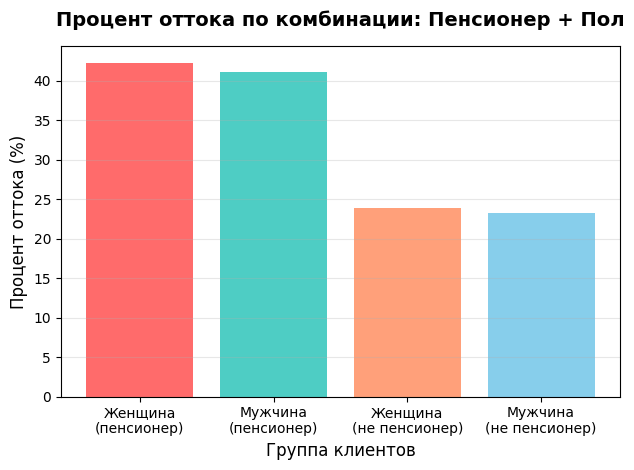

In [196]:
# Визуализация
colors = ['#FF6B6B', '#4ECDC4', '#FFA07A', '#87CEEB']
x_pos = range(len(churn_by_group))
bars = plt.bar(x_pos, churn_by_group.values, color=colors)
plt.title('Процент оттока по комбинации: Пенсионер + Пол', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Группа клиентов', fontsize=12)
plt.ylabel('Процент оттока (%)', fontsize=12)
plt.xticks(x_pos, [labels[group] for group in churn_by_group.index], fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Задание 2

In [199]:
"Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет) ? Одинаковая ли зависимость на разных типах интернета? Подберите тип визуализации и постройте график\\диаграмму, который смог бы ответить на эти вопросы."

In [200]:
# Создаем копию DataFrame для анализа только клиентов с интернетом
df_internet = df[df['InternetService'] != 'No'].copy()

In [201]:
# Список дополнительных услуг
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']


In [202]:
# Функция для подсчета количества подключенных услуг
def count_services(row):
    count = 0
    for service in additional_services:
        if row[service] == 'Yes':
            count += 1
    return count

In [203]:
# Применяем функцию к каждой строке
df_internet['ServicesCount'] = df_internet.apply(count_services, axis=1)

In [204]:
# 1. ОСНОВНАЯ ВИЗУАЛИЗАЦИЯ: Зависимость оттока от количества услуг по типам интернета
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [205]:
# Создаем сводную таблицу
pivot_data = df_internet.groupby(['InternetService', 'ServicesCount'])['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()

In [206]:
pivot_data

,InternetService,ServicesCount,Churn
0,DSL,0,41.156463
1,DSL,1,32.289157
2,DSL,2,20.264317
3,DSL,3,13.052632
4,DSL,4,9.192201
5,DSL,5,5.338078
6,DSL,6,1.398601
7,Fiber optic,0,60.401003
8,Fiber optic,1,55.898367
9,Fiber optic,2,48.013817


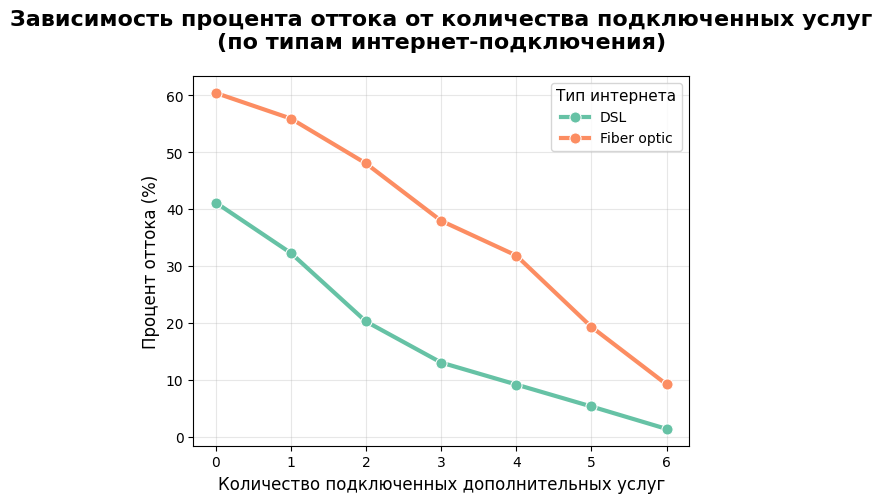

In [207]:
# Визуализация
sns.lineplot(data=pivot_data, x='ServicesCount', y='Churn',
             hue='InternetService', marker='o', linewidth=3, markersize=8)

plt.title('Зависимость процента оттока от количества подключенных услуг\n(по типам интернет-подключения)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Количество подключенных дополнительных услуг', fontsize=12)
plt.ylabel('Процент оттока (%)', fontsize=12)
plt.xticks(range(0, 7))
plt.grid(True, alpha=0.3)
plt.legend(title='Тип интернета', title_fontsize=11)

In [209]:
# 2. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: Heatmap с абсолютными числами
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [210]:
# Создаем кросс-таблицу для тепловой карты
heatmap_data = pd.crosstab(
    [df_internet['InternetService'], df_internet['ServicesCount']],
    df_internet['Churn'],
    normalize='index'
) * 100

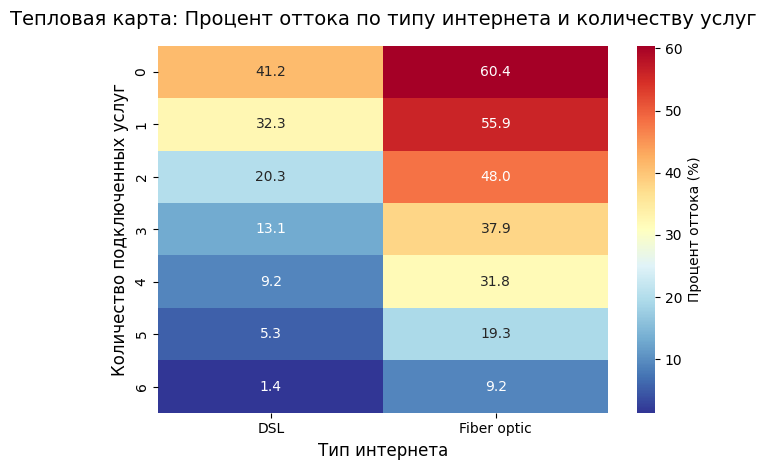

In [211]:
# Переформатируем для heatmap
heatmap_pivot = heatmap_data['Yes'].unstack('InternetService')

sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='RdYlBu_r',
           cbar_kws={'label': 'Процент оттока (%)'})
plt.title('Тепловая карта: Процент оттока по типу интернета и количеству услуг',
          fontsize=14, pad=15)
plt.xlabel('Тип интернета', fontsize=12)
plt.ylabel('Количество подключенных услуг', fontsize=12)
plt.tight_layout()
plt.show()

In [212]:
# 3. СТАТИСТИЧЕСКАЯ СВОДКА
print("=" * 70)
print("АНАЛИТИЧЕСКАЯ СВОДКА: ВЛИЯНИЕ КОЛИЧЕСТВА УСЛУГ НА ОТТОК")
print("=" * 70)

# Анализ по типам интернета
for internet_type in df_internet['InternetService'].unique():
    print(f"\n--- {internet_type.upper()} ---")
    type_data = df_internet[df_internet['InternetService'] == internet_type]

    for services_count in range(0, 7):
        count_data = type_data[type_data['ServicesCount'] == services_count]
        if len(count_data) > 0:
            churn_rate = (count_data['Churn'] == 'Yes').mean() * 100
            total_clients = len(count_data)
            print(f"Услуг: {services_count} | Клиентов: {total_clients:3d} | Отток: {churn_rate:5.1f}%")

# 4. АНАЛИЗ ЭФФЕКТИВНОСТИ "ПОГРУЖЕНИЯ В ЭКОСИСТЕМУ"
print("\n" + "=" * 70)
print("ВЫВОДЫ ДЛЯ БИЗНЕСА:")
print("=" * 70)

# Считаем средний отток для групп с разным количеством услуг
overall_effect = df_internet.groupby('ServicesCount')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

print("Общая зависимость оттока от количества услуг:")
for services, churn_rate in overall_effect.items():
    print(f"• {services} услуг: отток {churn_rate:.1f}%")

АНАЛИТИЧЕСКАЯ СВОДКА: ВЛИЯНИЕ КОЛИЧЕСТВА УСЛУГ НА ОТТОК

--- DSL ---
Услуг: 0 | Клиентов: 294 | Отток:  41.2%
Услуг: 1 | Клиентов: 415 | Отток:  32.3%
Услуг: 2 | Клиентов: 454 | Отток:  20.3%
Услуг: 3 | Клиентов: 475 | Отток:  13.1%
Услуг: 4 | Клиентов: 359 | Отток:   9.2%
Услуг: 5 | Клиентов: 281 | Отток:   5.3%
Услуг: 6 | Клиентов: 143 | Отток:   1.4%

--- FIBER OPTIC ---
Услуг: 0 | Клиентов: 399 | Отток:  60.4%
Услуг: 1 | Клиентов: 551 | Отток:  55.9%
Услуг: 2 | Клиентов: 579 | Отток:  48.0%
Услуг: 3 | Клиентов: 643 | Отток:  37.9%
Услуг: 4 | Клиентов: 493 | Отток:  31.8%
Услуг: 5 | Клиентов: 290 | Отток:  19.3%
Услуг: 6 | Клиентов: 141 | Отток:   9.2%

ВЫВОДЫ ДЛЯ БИЗНЕСА:
Общая зависимость оттока от количества услуг:
• 0 услуг: отток 52.2%
• 1 услуг: отток 45.8%
• 2 услуг: отток 35.8%
• 3 услуг: отток 27.4%
• 4 услуг: отток 22.3%
• 5 услуг: отток 12.4%
• 6 услуг: отток 5.3%


In [213]:
# Анализ оптимального количества услуг
min_churn_services = overall_effect.idxmin()
min_churn_rate = overall_effect.min()

In [214]:
print(f"\n📊 РЕКОМЕНДАЦИИ:")
print(f"• Минимальный отток наблюдается при {min_churn_services} услугах ({min_churn_rate:.1f}%)")
print(f"• Клиенты с 0 услуг уходят в {overall_effect[0]/min_churn_rate:.1f} раза чаще!")

# Анализ по типам интернета
print(f"\n📈 РАЗБИВКА ПО ТИПАМ ИНТЕРНЕТА:")
for internet_type in df_internet['InternetService'].unique():
    type_effect = df_internet[df_internet['InternetService'] == internet_type].groupby('ServicesCount')['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    )
    best_services = type_effect.idxmin()
    best_rate = type_effect.min()
    worst_rate = type_effect.max()

    print(f"• {internet_type}: лучший результат при {best_services} услугах ({best_rate:.1f}% оттока)")


📊 РЕКОМЕНДАЦИИ:
• Минимальный отток наблюдается при 6 услугах (5.3%)
• Клиенты с 0 услуг уходят в 9.9 раза чаще!

📈 РАЗБИВКА ПО ТИПАМ ИНТЕРНЕТА:
• DSL: лучший результат при 6 услугах (1.4% оттока)
• Fiber optic: лучший результат при 6 услугах (9.2% оттока)


In [215]:
# 5. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: Распределение клиентов по количеству услуг
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

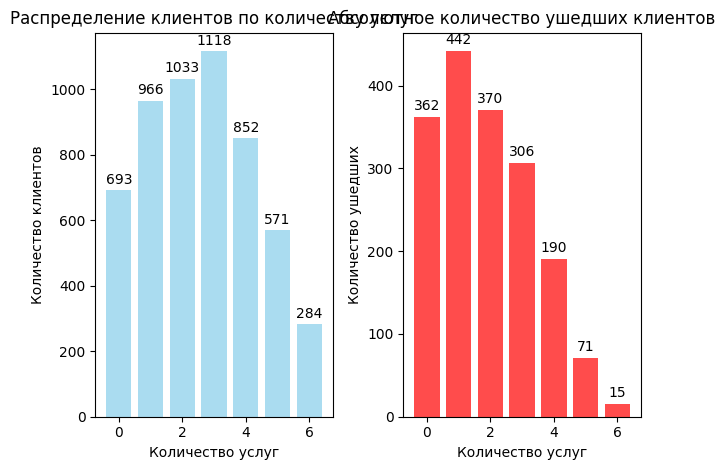

In [216]:
plt.subplot(1, 2, 1)
# Распределение количества услуг
services_dist = df_internet['ServicesCount'].value_counts().sort_index()
plt.bar(services_dist.index, services_dist.values, color='skyblue', alpha=0.7)
plt.title('Распределение клиентов по количеству услуг', fontsize=12)
plt.xlabel('Количество услуг')
plt.ylabel('Количество клиентов')
for i, v in enumerate(services_dist.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(1, 2, 2)
# Отток в абсолютных числах
churn_counts = df_internet[df_internet['Churn'] == 'Yes']['ServicesCount'].value_counts().sort_index()
plt.bar(churn_counts.index, churn_counts.values, color='red', alpha=0.7)
plt.title('Абсолютное количество ушедших клиентов', fontsize=12)
plt.xlabel('Количество услуг')
plt.ylabel('Количество ушедших')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()